<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

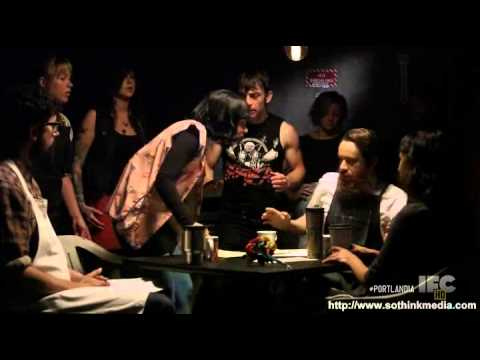

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Emma\\Desktop\\DS-Unit-4-Sprint-1-NLP-master\\DS-Unit-4-Sprint-1-NLP-master\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [27]:
shops.shape

(7616, 4)

In [26]:
# Start here 
shops['coffee_shop_name'].value_counts()[:25]

#the coffee shops with the most reviews must be really good or really bad

Epoch Coffee                       400
Halcyon                            300
The Factory - Cafe With a Soul     244
Venezia Italian Gelato             200
Houndstooth Coffee                 200
Caffé Medici                       143
Apanas Coffee & Beer               136
Flightpath Coffeehouse             100
Teo                                100
Jo’s Coffee                        100
Patika                             100
Cenote                             100
Lola Savannah Coffee Lounge        100
Tea Haus                           100
Stinson’s                          100
Sorrento’s Coffee                  100
Picnik Austin                      100
Live Oak Market                    100
Alta’s Cafe                        100
Cuvée Coffee Bar                   100
The Hideout Coffeehouse            100
Strange Brew, Austin Coffee        100
Caffe Medici                       100
Irie Bean Coffee Bar               100
TOMS                               100
Name: coffee_shop_name, d

In [12]:
shops['date_of_review'] = shops['full_review_text'].apply(lambda x: x.split()[0])

In [33]:
sample = 'This is my sample 150'

In [44]:
import re 

re.sub(r'[^a-zA-Z\s]', '', sample)

'This is my sample '

In [46]:
def remove_dates(text):
    no_dates = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return no_dates

In [50]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: remove_dates(x))

In [52]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date_of_review
0,The Factory - Cafe With a Soul,checkin Love love loved the atmosphere Ever...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,checkin Listed in Brunch Spots I loved the ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,checkin They are located within the Northcr...,4.0 star rating,12/3/2016


In [64]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: x.split()[0])

In [65]:
shops.head()

#all nice and clean

,coffee_shop_name,full_review_text,star_rating,date_of_review
0,The Factory - Cafe With a Soul,checkin Love love loved the atmosphere Ever...,5.0,11/25/2016
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,12/2/2016
2,The Factory - Cafe With a Soul,checkin Listed in Brunch Spots I loved the ...,4.0,11/30/2016
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,11/25/2016
4,The Factory - Cafe With a Soul,checkin They are located within the Northcr...,4.0,12/3/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [68]:
def tokenize(text):
    '''parses string into individual words
       this regex keeps upper/lower case letters and numbers only'''
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [69]:
shops['token_reviews'] = shops['full_review_text'].apply(tokenize)

In [71]:
shops['token_reviews'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: token_reviews, dtype: object

In [75]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date_of_review,token_reviews
0,The Factory - Cafe With a Soul,checkin Love love loved the atmosphere Ever...,5.0,11/25/2016,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,Listed in Date Night Austin Ambiance in Aust...,4.0,12/2/2016,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,checkin Listed in Brunch Spots I loved the ...,4.0,11/30/2016,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,Very cool decor Good drinks Nice seating Ho...,2.0,11/25/2016,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,checkin They are located within the Northcr...,4.0,12/3/2016,"[checkin, they, are, located, within, the, nor..."


In [74]:
from collections import Counter

word_counts = Counter()

shops['token_reviews'].apply(lambda x: word_counts.update(x))
word_counts.most_common(20)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546),
 ('it', 9380),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426)]

In [76]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending = False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns = ['word', 'appears_in'])
    wc = ac.merge(wc, on = 'word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')
        
    

In [77]:
wc = count(shops['token_reviews'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
55,the,6847,34809,1.0,0.045412,0.045412,0.899028
2,and,6864,26651,2.0,0.034769,0.080180,0.901261
4,a,6246,22756,3.0,0.029687,0.109868,0.820116
10,i,5532,20249,4.0,0.026417,0.136284,0.726366
27,to,5653,17164,5.0,0.022392,0.158676,0.742253


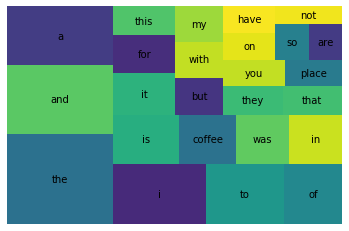

In [78]:
import squarify
import matplotlib.pyplot as plt

wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes= wc_top25['pct_total'], label = wc_top25['word'], alpha = 1)
plt.axis('off')
plt.show()

In [82]:
#tokenize pipeline using spacy

tokens = []

'''make tokens with spacy'''

for doc in tokenizer.pipe(shops['full_review_text'], batch_size = 500):
    
    doc_tokens = []
    
    for token in doc:
    if (token.is_stop == False) & (token.is_punct == False):
        doc_tokens.append(token.text.lower())
    
shops['token_reviews'] = tokens

In [83]:
shops['token_reviews'].head()

0    [   , checkin, Love, love, loved, the, atmosph...
1    [  , Listed, in, Date, Night, Austin, Ambiance...
2    [   , checkin, Listed, in, Brunch, Spots, I, l...
3    [  , Very, cool, decor, Good, drinks, Nice, se...
4    [   , checkin, They, are, located, within, the...
Name: token_reviews, dtype: object

In [84]:
wc = count(shops['token_reviews'])

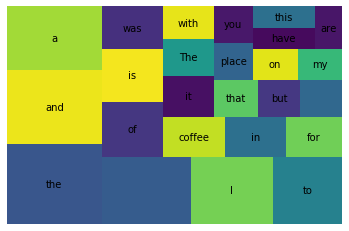

In [85]:
wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes = wc_top25['pct_total'], label = wc_top25['word'], alpha = 1)
plt.axis('off')
plt.show()

In [80]:
#SHOULD HAVE BEEN USING SPACY

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_md')

#actual tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [115]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'checkin', ' ', '', '  ', '   ', 'go', 'place', 'time', 'for', 'get', 'be', 'try', 's'])

In [111]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [112]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [113]:
shops['lemmas'].head()

0    [Love, love, love, atmosphere, corner, shop, s...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

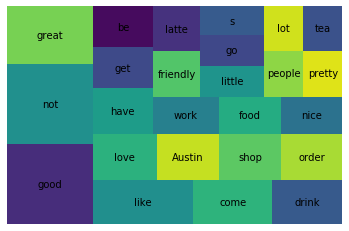

In [114]:
wc = count(shops['lemmas'])
wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes = wc_top25['pct_total'], label = wc_top25['word'], alpha = 1)
plt.axis('off')
plt.show()

In [116]:
shops.columns

Index(['coffee_shop_name', 'full_review_text', 'star_rating', 'date_of_review',
       'token_reviews', 'lemmas'],
      dtype='object')

In [130]:
mask = shops['star_rating'] == '5.0'

In [133]:
shops['full_review_text'][3]

'  Very cool decor Good drinks Nice seating  However  Just about everything is overpriced  extra for  ounces of Almond Milk in a cortado No WiFi Music is a bit loud and the mix is odd  Pleasant French oldies followed by loud techno Several tables were dirty when we got there Service is average  It feels like a Los Angeles coffee shot that is out of place '

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

